# DIMENSIONALITY REDUCTION IN PYTHON

## Exploring high dimensional data 

### Introduction

Tidy data
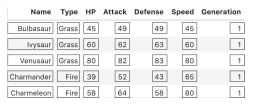

The shape attribute

In [ ]:
pokemon_df.shape
# (5, 7)

When to use dimensionality reduction? (high dimension -- > 10 features)
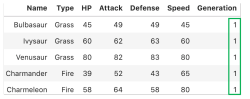
Generation will not help, so we can drop and reduce dimensionality

The describe method
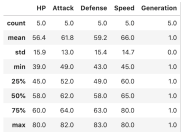

In [ ]:
pokemon_df.describe()

pokemon_df.describe(exclude='number')

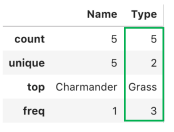

In [ ]:
#Example
# Leave this list as is (we previously removed generation that had no variance)
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

### Feature selection vs feature extraction 

Why reduce dimensionality?

Your dataset will:
- be less complex
- require less disk space
- require less computation time
- have lower chance of model over

Feature selection
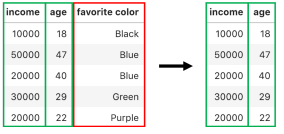

In [ ]:
insurance_df.drop('favorite color', axis=1)

Building a pairplot on ANSUR data

In [ ]:
sns.pairplot(ansur_df, hue="gender", diag_kind='hist')

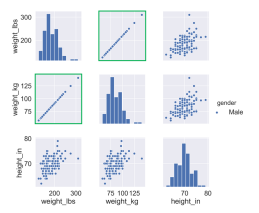
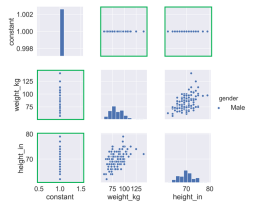

Feature selection
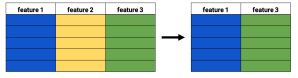
Feature extraction (less intuitive to understand)
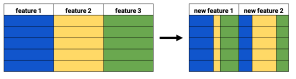

Feature extraction - Example
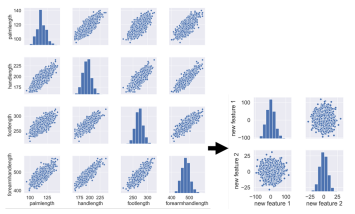

In [ ]:
#Example
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue="Gender", diag_kind='hist')

# Show the plot
plt.show()

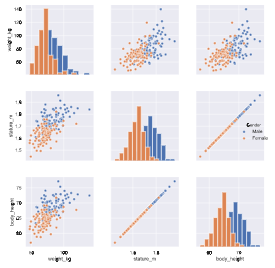

In [ ]:
#Example
# Remove one of the redundant features
reduced_df = ansur_df_1.drop("body_height", axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

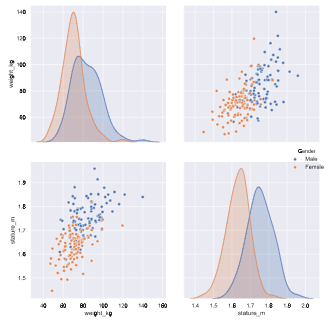

In [ ]:
#Example
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue="Gender", diag_kind='hist')

# Show the plot
plt.show()

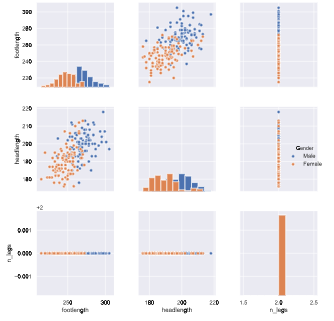

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop("n_legs", axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

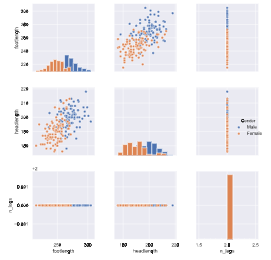

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop("n_legs", axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

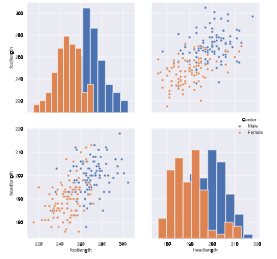

### t-SNE visualization of high-dimensional data 

t-SNE on IRIS dataset
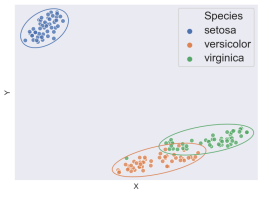

t-SNE on female ANSUR dataset

In [ ]:
df.shape
# (1986, 99) #more challenging than iris

non_numeric = ['BMI_class','Height_class',
               'Gender','Component','Branch']

df_numeric = df.drop(non_numeric, axis=1)

df_numeric.shape
# (1986, 94)

Fitting t-SNE

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50) #try different configuration according to a cost function. 50 is more conservative

tsne_features = m.fit_transform(df_numeric)

tsne_features[1:4,:] #two dimensions (plotting a few)
# array([[-37.962185, 15.066088],
#        [-21.873512, 26.334448],
#        [ 13.97476 , 22.590828]], dtype=float32

Assigning t-SNE features to our dataset

In [ ]:
tsne_features[1:4,:]
# array([[-37.962185, 15.066088],
#        [-21.873512, 26.334448],
#        [ 13.97476 , 22.590828]], dtype=float32)

df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

Plotting t-SNE

In [ ]:
import seaborn as sns
sns.scatterplot(x="x", y="y", data=df)
plt.show()

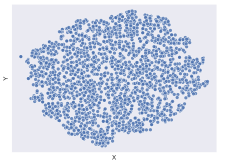

Coloring points according to BMI category

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="x", y="y", hue='BMI_class', data=df)

plt.show()

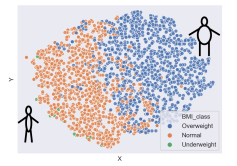

Coloring points according to height category

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="x", y="y", hue='Height_class', data=df)
plt.show()

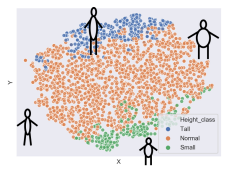

In [ ]:
#Example
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

# <script.py> output:
#     (6068, 2)

In [ ]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue="Component", data=df)

# Show the plot
plt.show()

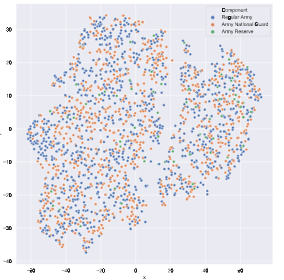

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue="Branch", data=df)

# Show the plot
plt.show()

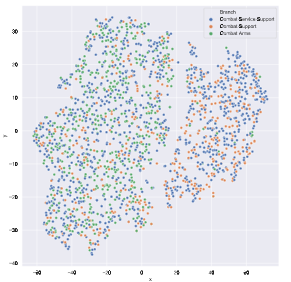

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue="Gender", data=df)

# Show the plot
plt.show()

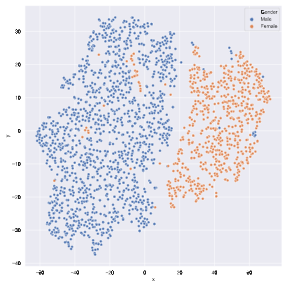

## Feature selection I, selecting for feature information

### The curse of dimensionality 

Overfit badly in high dimension data

From observation to pattern (just few data leads to overfitting)
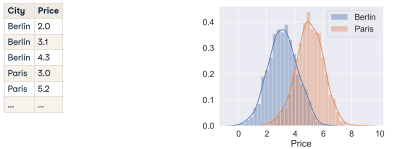

Building a city classifier - data split
- Separate the feature we want to predict from the ones to train the model on.

In [ ]:
y = house_df['City']
X = house_df.drop('City', axis=1)

Perform a 70% train and 30% test data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Building a city classifier - model fit
- Create a Support Vector Machine Classier and fit to training data

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

Building a city classifier - predict

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, svc.predict(X_test)))
# 0.826

print(accuracy_score(y_train, svc.predict(X_train)))
# 0.832

Adding features (to improve score - observations should increase exponentially when added new features)
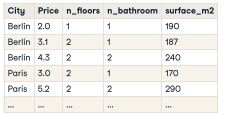

In [ ]:
#Example
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df["Gender"]

# Remove the Gender column to create the training data
X = ansur_df.drop("Gender", axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

# <script.py> output:
#     300 rows in test set vs. 700 in training set. 91 Features.

In [ ]:
#Example
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

# <script.py> output:
#     49.7% accuracy on test set vs. 100.0% on training set

In [ ]:
#Example
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[["neckcircumferencebase"]]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

# <script.py> output:
#     93.3% accuracy on test set vs. 94.9% on training set

### Features with missing values of little variance 

Creating a feature selector

In [ ]:
print(ansur_df.shape)
# (6068, 94)

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)
sel.fit(ansur_df)

mask = sel.get_support()
print(mask)
# array([ True, True, ..., False, True]) #above the threshold or not (booleanmask)

Applying a feature selector

In [ ]:
print(ansur_df.shape)
# (6068, 94)

reduced_df = ansur_df.loc[:, mask] #select wanted columns
print(reduced_df.shape)
# (6068, 93)

Variance selector caveats

In [ ]:
buttock_df.boxplot() #comparing the variances

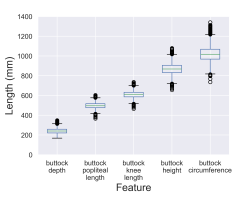

Normalizing the variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)

sel.fit(ansur_df / ansur_df.mean())
mask = sel.get_support()
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)
# (6068, 45)

Missing value selector

Identifying missing values

In [ ]:
pokemon_df.isna()

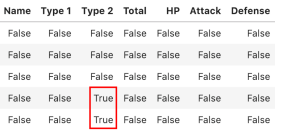

Counting missing values

In [ ]:
pokemon_df.isna().sum()
# Name 0
# Type 1 0
# Type 2 386
# Total 0
# HP 0
# Attack 0
# Defense 0
# dtype: int64

In [ ]:
pokemon_df.isna().sum() / len(pokemon_df)
# Name 0.00
# Type 1 0.00
# Type 2 0.48
# Total 0.00
# HP 0.00
# Attack 0.00
# Defense 0.00
# dtype: float64

Applying a missing value threshold

In [ ]:
# Fewer than 30% missing values = True value
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print(mask)
# Name True
# Type 1 True
# Type 2 False
# Total True
# HP True
# Attack True
# Defense True
# dtype: bool

Applying a missing value threshold

In [ ]:
reduced_df = pokemon_df.loc[:, mask]
reduced_df.head()

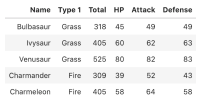

In [ ]:
#Examples
# Create the boxplot
head_df.boxplot()

plt.show()

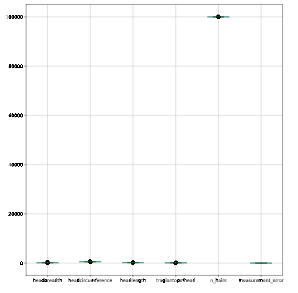

In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

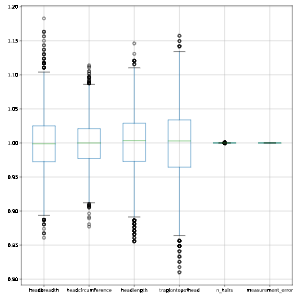

In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

# <script.py> output:
#     headbreadth          1.678952e-03
#     headcircumference    1.029623e-03
#     headlength           1.867872e-03
#     tragiontopofhead     2.639840e-03
#     n_hairs              1.002552e-08
#     measurement_error    3.231707e-27
#     dtype: float64

# You're right! A threshold of 1.0e-03 (0.001) will remove the two low variance features.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

# <script.py> output:
#     Dimensionality reduced from 6 to 4.

In [ ]:
#Example
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)
# <script.py> output:
#     (131, 21)
#     (131, 19)

### Pairwise correlation 

Pairwise correlation

In [ ]:
sns.pairplot(ansur, hue="gender")

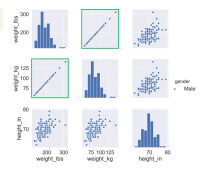

Correlation coefficient
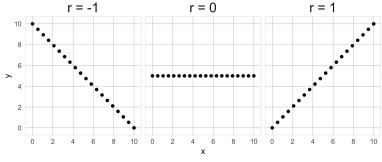
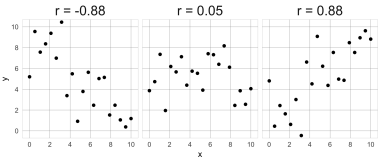

Correlation matrix

In [ ]:
weights_df.corr()

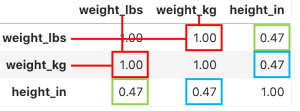

Visualizing the correlation matrix

In [ ]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)

sns.heatmap(weights_df.corr(), center=0,
            cmap=cmap, linewidths=1,
            annot=True, fmt=".2f")

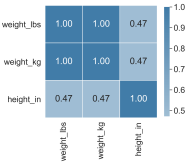

In [ ]:
corr = weights_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
# array([[ True, True, True],
#      [False, True, True],
#      [False, False, True]])

In [ ]:
sns.heatmap(weights_df.corr(), mask=mask,
            center=0, cmap=cmap, linewidths=1,
            annot=True, fmt=".2f")

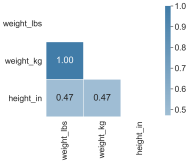
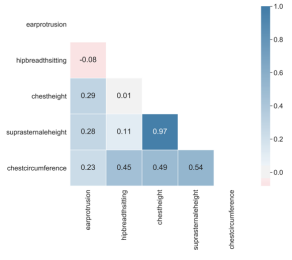

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

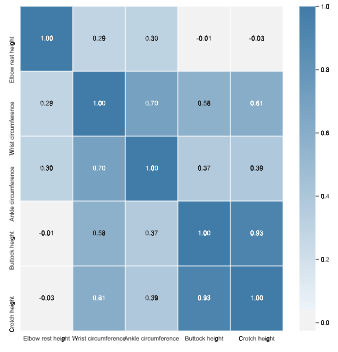

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

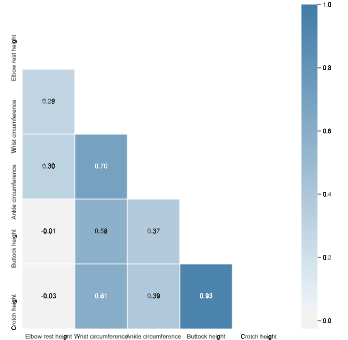

### Removing highly correlated features 

Highly correlated data
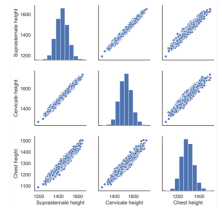

Highly correlated features
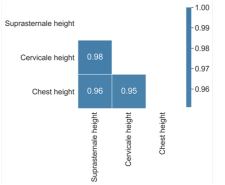

Removing highly correlated features

In [ ]:
# Create positive correlation matrix
corr_df = chest_df.corr().abs()

# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_matrix.mask(mask)
tri_df

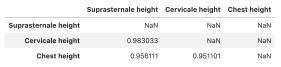

In [ ]:
# Find columns that meet treshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)
# ['Suprasternale height','Cervicale height']

# Drop those columns
reduced_df = chest_df.drop(to_drop, axis=1)

Feature selection
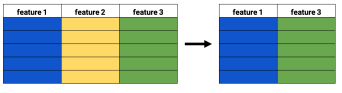
Feature extraction
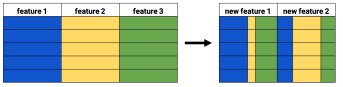

Correlation caveats - Anscombe's quartet
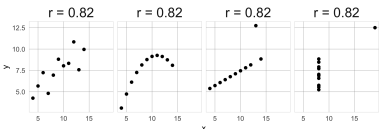

Correlation caveats - causation (in the case, not causation)

In [ ]:
sns.scatterplot(x="N firetrucks sent to fire",
                y="N wounded by fire",
                data=fire_df)

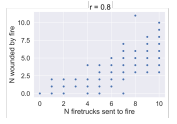

In [ ]:
#Example
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

# The original dataframe has 99 columns.

# <script.py> output:
#     The reduced dataframe has 88 columns.

In [ ]:
# Print the first five lines of weird_df
print(weird_df.head())

# <script.py> output:
#        pool_drownings  nuclear_energy
#     0             421           728.3
#     1             465           753.9
#     2             494           768.8
#     3             538           780.1
#     4             430           763.7

# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x="nuclear_energy", y="pool_drownings", data=weird_df)
plt.show()

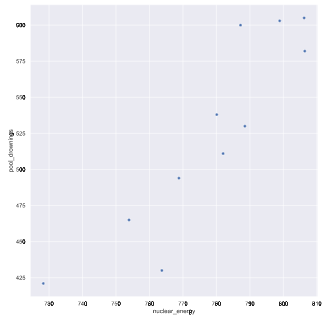

In [ ]:
# <script.py> output:
#                     pool_drownings  nuclear_energy
#     pool_drownings        1.000000        0.901179
#     nuclear_energy        0.901179        1.000000

## Feature selection II, selecting for model accuracy 

### Selecting features for model performance 

Ansur dataset sample
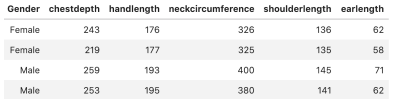

Pre-processing the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

Creating a logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

#obs: é importante usar o scaler.transform na base de teste porque ele foi fitado na 
#base de treino (não faz sentido eu ter uma nova padronização a cada dado novo que entra)
X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)

print(accuracy_score(y_test, y_pred))
# 0.99

Inspecting the feature coefficients

In [ ]:
print(lr.coef_)
# array([[-3. , 0.14, 7.46, 1.22, 0.87]]) #some are close to 0. will contribute little (already standardized)

print(dict(zip(X.columns, abs(lr.coef_[0]))))
# {'chestdepth': 3.0,
# 'handlength': 0.14, #candidate to remove
# 'neckcircumference': 7.46,
# 'shoulderlength': 1.22,
# 'earlength': 0.87}

Features that contribute little to a model

In [ ]:
X.drop('handlength', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr.fit(scaler.fit_transform(X_train), y_train)

print(accuracy_score(y_test, lr.predict(scaler.transform(X_test))))
# 0.99 #keeps the same, but less complexity

#### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), 
          n_features_to_select=2, 
          verbose=1)

rfe.fit(X_train_std, y_train)
# Fitting estimator with 5 features.
# Fitting estimator with 4 features.
# Fitting estimator with 3 features.

Dropping a feature will affect other feature's coefficients

Inspecting the RFE results

In [ ]:
X.columns[rfe.support_]
# Index(['chestdepth','neckcircumference'], dtype='object')

#shows which iteration the feature was dropped. high values - dropped early on. 1 is for the ones that are choosen
print(dict(zip(X.columns, rfe.ranking_)))
# {'chestdepth': 1,
# 'handlength': 4,
# 'neckcircumference': 1,
# 'shoulderlength': 2,
# 'earlength': 3}

print(accuracy_score(y_test, rfe.predict(X_test_std)))
# 0.99

In [ ]:
#Example
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

# <script.py> output:
#     79.6% accuracy on test set.
#     {'pregnant': 0.04, 'glucose': 1.23, 'diastolic': 0.03, 
#      'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.34, 'age': 0.34}

#removed diastolic
# <script.py> output:
#     80.6% accuracy on test set.
#     {'pregnant': 0.05, 'glucose': 1.23, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}

#removed preganant and insulin
# <script.py> output:
#     79.6% accuracy on test set.
#     {'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}

#only glucose
# <script.py> output:
#     76.5% accuracy on test set.
#     {'glucose': 1.27}

In [ ]:
#Example
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

#<script.py> output:
#     Fitting estimator with 8 features.
#     Fitting estimator with 7 features.
#     Fitting estimator with 6 features.
#     Fitting estimator with 5 features.
#     Fitting estimator with 4 features.
#     {'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
#     Index(['glucose', 'bmi', 'age'], dtype='object')
#     80.6% accuracy on test set.

### Tree-based feature selection 

Random forest classifier
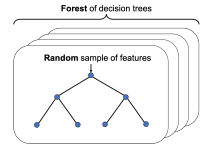

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(accuracy_score(y_test, rf.predict(X_test)))
0.99

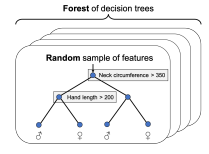

Feature importance values

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(rf.feature_importances_)
# array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.04, 0. , 0.01, 0.01,
# 0. , 0. , 0. , 0. , 0.01, 0.01, 0. , 0. , 0. , 0. , 0.05,
# ...
# 0. , 0.14, 0. , 0. , 0. , 0.06, 0. , 0. , 0. , 0. , 0. ,
# 0. , 0.07, 0. , 0. , 0.01, 0. ])

print(sum(rf.feature_importances_))
# 1.0

Feature importance as a feature selector

In [ ]:
mask = rf.feature_importances_> 0.1 #create a true/false mask
print(mask)
# array([False, False, ..., True, False])

X_reduced = X.loc[:, mask]

print(X_reduced.columns)
# Index(['chestheight','neckcircumference','neckcircumferencebase',
#        'shouldercircumference'], dtype='object')

RFE with random forests

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(),
          n_features_to_select=6, 
          verbose=1)

rfe.fit(X_train,y_train)

# Fitting estimator with 94 features.
# Fitting estimator with 93 features
# ...
# Fitting estimator with 8 features.
# Fitting estimator with 7 features.

print(accuracy_score(y_test, rfe.predict(X_test))
# 0.99

RFE with random forests

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(),
          n_features_to_select=6,
          step=10, #drops from 10 to 10
          verbose=1)

rfe.fit(X_train,y_train)
# Fitting estimator with 94 features.
# Fitting estimator with 84 features.
# ...
# Fitting estimator with 24 features.
# Fitting estimator with 14 features.

print(X.columns[rfe.support_])
# Index(['biacromialbreadth','handbreadth','handcircumference',
#        'neckcircumference','neckcircumferencebase','shouldercircumference'], dtype='object')

In [ ]:
#Example
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

# <script.py> output:
#     {'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 
#      'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
#     77.6% accuracy on test set.

In [ ]:
#Example
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)
# <script.py> output:
#     [False  True False False False False False  True]

# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)
# <script.py> output:
#     Index(['glucose', 'age'], dtype='object')

In [ ]:
#Example
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

# <script.py> output:
#     Fitting estimator with 8 features.
#     Fitting estimator with 7 features.
#     Fitting estimator with 6 features.
#     Fitting estimator with 5 features.
#     Fitting estimator with 4 features.
#     Fitting estimator with 3 features.
#     Index(['glucose', 'insulin'], dtype='object')

#Example (using step 2)
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step = 2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

# <script.py> output:
#     Fitting estimator with 8 features.
#     Fitting estimator with 6 features.
#     Fitting estimator with 4 features.
#     Index(['glucose', 'insulin'], dtype='object')

### Regularized linear regression 

Linear model concept
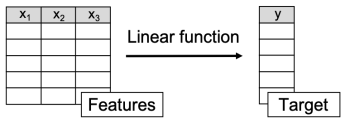

Creating our own dataset
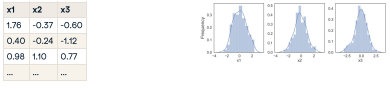

Creating our own target feature:
y = 20 + 5x1 + 2x2 + 0x3 + error (x has no effect - can confuse and overfit)

Linear regression in Python

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(lr.coef_)
# [ 4.95 1.83 -0.05]

# Actual intercept = 20
print(lr.intercept_)
# 19.8

In [ ]:
# Calculates R-squared
print(lr.score(X_test, y_test))
# 0.976

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(lr.coef_)
# [ 4.95 1.83 -0.05]

Loss function: Mean Squared Error
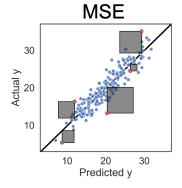

Adding regularization
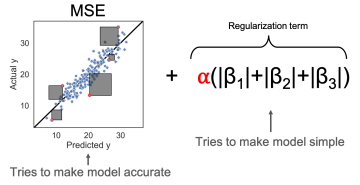
¹alpha: 
- when it's too low the model might overfit, 
- when it's too high the model might become too simple and inaccurate. 
- One linear model that includes this type of regularization is called Lasso, for least absolute shrinkage

Lasso regressor

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(la.coef_)

# [4.07 0.59 0. ]
print(la.score(X_test, y_test))
# 0.861

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.05)
la.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(la.coef_)
# [ 4.91 1.76 0. ]

print(la.score(X_test, y_test))
# 0.974

In [ ]:
#Example
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

# <script.py> output:
#     The model can predict 84.7% of the variance in the test set.
#     The model has ignored 82 out of 91 features.

In [ ]:
#Example
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha = 0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

# <script.py> output:
#     The model can predict 98.3% of the variance in the test set.
#     64 out of 91 features were ignored.

### Combining feature selectors 

Lasso regresso

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.05)
la.fit(X_train, y_train)
# Actual coefficients = [5 2 0]

print(la.coef_)
# [ 4.91 1.76 0. ]

print(la.score(X_test, y_test))
# 0.974

LassoCV regressor

In [ ]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
lcv.fit(X_train, y_train)

print(lcv.alpha_)
# 0.09

In [ ]:
mask = lcv.coef_!= 0
print(mask)

# [ True True False ]
reduced_X = X.loc[:, mask]

Taking a step back
- Random forest is combination of decision trees.
- We can use combination of models for feature selection too.

Feature selection with LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()
lcv.fit(X_train, y_train)

lcv.score(X_test, y_test)
# 0.99

lcv_mask = lcv.coef_!= 0
sum(lcv_mask)
# 66

Feature selection with random forest

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe_rf = RFE(estimator=RandomForestRegressor(),
             n_features_to_select=66, step=5, verbose=1)

rfe_rf.fit(X_train, y_train)
rf_mask = rfe_rf.support_

Feature selection with gradient boosting

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(),
             n_features_to_select=66, step=5, verbose=1)

rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

Combining the feature selectors

In [ ]:
import numpy as np

votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

print(votes)
# array([3, 2, 2, ..., 3, 0, 1])

mask = votes >= 2
reduced_X = X.loc[:, mask]

METODOLOGIA (DE FORMA GERAL)
- Utiliza o LassoCV para pegar o número de features
- Usar o RFE com a quantidade de features anteriores para outros modelos e obter as features pelo .support_
- Montar uma votação com a combinação de todas as máscaras

In [ ]:
#Example
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_!=0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

# <script.py> output:
#     Optimal alpha = 0.089
#     The model explains 88.2% of the test set variance
#     26 features out of 32 selected

In [ ]:
#Example
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

#Using RF
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

In [ ]:
#Example

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis = 0)
print(votes)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3
print(meta_mask)

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

# <script.py> output:
#     The model can explain 86.8% of the variance in the test set using 7 features.

## Feature extraction 

### Feature extraction 

Feature selection
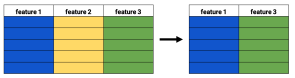
Feature extraction
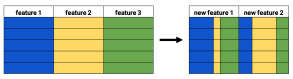

Feature generation - BMI

In [ ]:
df_body['BMI'] = df_body['Weight kg'] / df_body['Height m'] ** 2

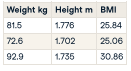

In [ ]:
df_body.drop(['Weight kg','Height m'], axis=1)

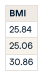

Feature generation - averages
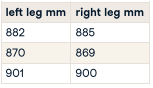

In [ ]:
leg_df['leg mm'] = leg_df[['right leg mm','left leg mm']].mean(axis=1)

In [ ]:
leg_df.drop(['right leg mm','left leg mm'], axis=1)

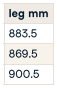

Cost of taking the average **(loose the information of difference)**
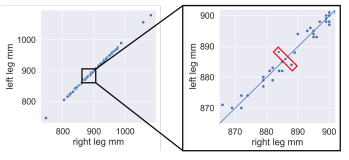

Intro to PCA

In [ ]:
sns.scatterplot(data=df, x='handlength', y='footlength')

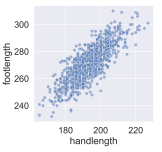

In [ ]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

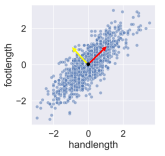

In [ ]:
#Example
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df.revenue/sales_df.quantity

# Drop the quantity and revenue features
reduced_df = sales_df.drop(["quantity", "revenue"], axis=1)

print(reduced_df.head())

In [ ]:
#Example
# Calculate the mean height
height_df['height'] = height_df[["height_1", "height_2", "height_3"]].mean(axis = 1)

# Drop the 3 original height features
reduced_df = height_df.drop(["height_1", "height_2", "height_3"], axis=1)

print(reduced_df.head())

### Principal Component analysis 

PCA concept
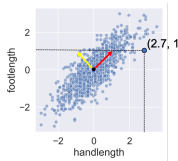
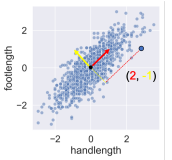

Calculating the principal components

In [ ]:
from sklearn.preprocessing import StandardScaler #PCA will underperform if do not scale
scaler = StandardScaler()
std_df = scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA()
print(pca.fit_transform(std_df))
# [[-0.08320426 -0.12242952]
# [ 0.31478004 0.57048158]
# ...
# [-0.5609523 0.13713944]
# [-0.0448304 -0.37898246]]

PCA removes correlation
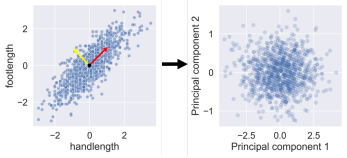

Principal component explained variance ratio

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_df)

print(pca.explained_variance_ratio_) #after fitting
# array([0.90, 0.10])

PCA for dimensionality reduction
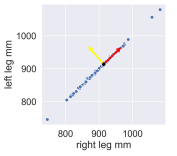

In [ ]:
print(pca.explained_variance_ratio_)
# array([0.9997, 0.0003])

In [ ]:
pca = PCA()
pca.fit(ansur_std_df)
print(pca.explained_variance_ratio_) #first two explain almost all variance of the data
# array([0.44, 0.18, 0.04, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,
# 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
# 0.01, 0.01, 0.01, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
# ...
# 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
# 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
# 0. , 0. , 0. , 0. , 0. , 0. ])

In [ ]:
pca = PCA()
pca.fit(ansur_std_df)
print(pca.explained_variance_ratio_.cumsum())
# array([0.44, 0.62, 0.66, 0.69, 0.72, 0.74, 0.76, 0.77, 0.79, 0.8 , 0.81,
# 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.89, 0.9 ,
# 0.9 , 0.91, 0.92, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94, 0.95,
# ...
# 0.99, 0.99, 0.99, 0.99, 0.99, 1. , 1. , 1. , 1. , 1. , 1. ,
# 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
# 1. , 1. , 1. , 1. , 1. , 1. ])

In [ ]:
#Example
# Create a pairplot to inspect ansur_df
sns.pairplot(data = ansur_df)

plt.show()

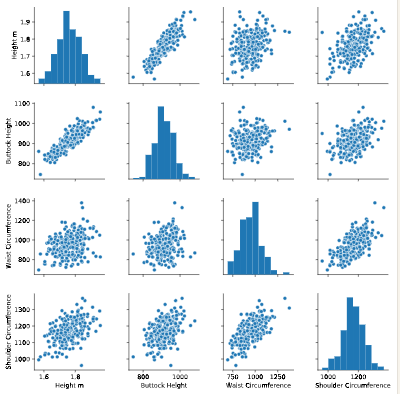

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

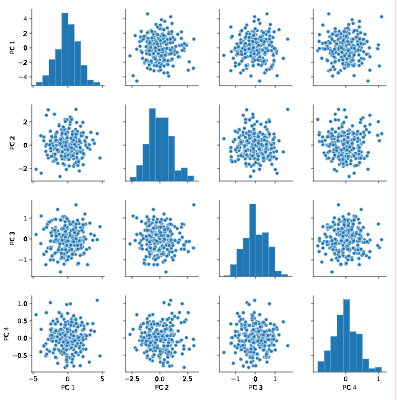

In [ ]:
#Example
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

In [ ]:
#Example
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)
# <script.py> output:
#     [0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
#      0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
#      0.00065268]

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())
# <script.py> output:
#     [0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
#      0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
#      1.        ]

### PCA applications 

Understanding the components

In [ ]:
print(pca.components_)
# array([[ 0.71, 0.71],
#        [ -0.71, 0.71]])

- PC 1 = 0.71 x Hand length + 0.71 x Foot length
- PC 2 = -0.71 x Hand length + 0.71 x Foot length

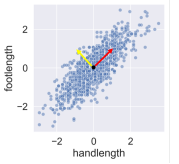

PCA for data exploration
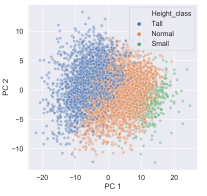

PCA in a pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('reducer', PCA())
                ])

pc = pipe.fit_transform(ansur_df)

print(pc[:,:2])
# array([[-3.46114925, 1.5785215 ],
# [ 0.90860615, 2.02379935],
# ...,
# [10.7569818 , -1.40222755],
# [ 7.64802025, 1.07406209]])

Checking the effect of categorical features

In [ ]:
print(ansur_categories.head())

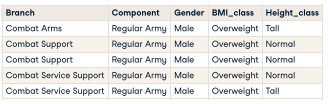

Checking the effect of categorical features

In [ ]:
ansur_categories['PC 1'] = pc[:,0]
ansur_categories['PC 2'] = pc[:,1]

#plot first two components
sns.scatterplot(data=ansur_categories,
                x='PC 1', y='PC 2',
                hue='Height_class', alpha=0.4)

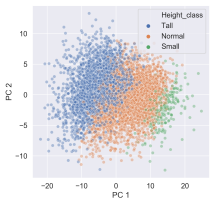

In [ ]:
sns.scatterplot(data=ansur_categories,
                x='PC 1', y='PC 2',
                hue='Gender', alpha=0.4)

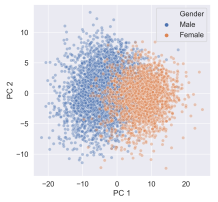

In [ ]:
sns.scatterplot(data=ansur_categories,
                x='PC 1', y='PC 2',
                hue='BMI_class', alpha=0.4)

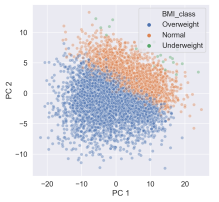

PCA in a model pipeline

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=3)),
    ('classifier', RandomForestClassifier())])

pipe.fit(X_train, y_train)

print(pipe.steps[1])
# ('reducer',
#  PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
#      svd_solver='auto', tol=0.0, whiten=False))

In [ ]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()
# array([0.56, 0.69, 0.74])

print(pipe.score(X_test, y_test))
# 0.986

In [ ]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)
print(pipe.steps) #esse fui eu

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

# <script.py> output:
#     [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reducer', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#       svd_solver='auto', tol=0.0, whiten=False))]
#     PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
#     PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}

In [ ]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)
# <script.py> output:
#     [[-1.5563747  -0.02148212]
#      [-0.36286656 -0.05026854]
#      [ 1.28015158 -0.06272022]
#      ...
#      [ 2.45821626 -0.51588158]
#      [ 3.5303971  -0.95106516]
#      [ 2.23378629  0.53762985]]



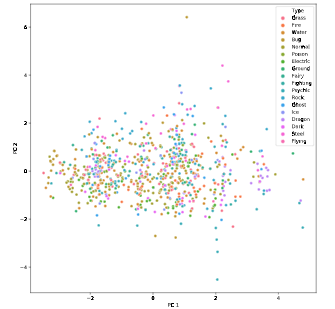

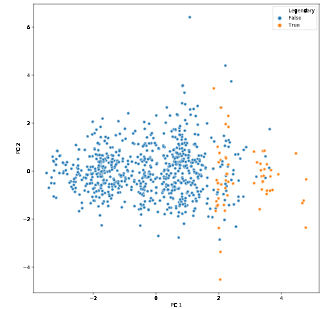

In [ ]:
#Example - 2 components
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

# <script.py> output:
#     [0.45624044 0.17767414]
# <script.py> output:
#     95.8% test set accuracy
    
#3 components
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

# <script.py> output:
#     [0.45624044 0.17767414 0.12858833]
#     95.0% test set accuracy

### Principal Component selection 

Setting an explained variance threshold

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))]) #select enough components to explain the amount of variance of the components 
# gut feeling
# how much information are you willing to sacrifice to reduce complexity

# Fit the pipe to the data
pipe.fit(poke_df)

print(len(pipe.steps[1][1].components_))
# 5

An optimal number of components

In [ ]:
pipe.fit(poke_df)

var = pipe.steps[1][1].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show() #select two in the case

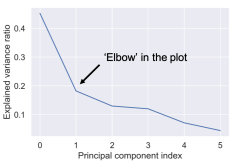

PCA operations
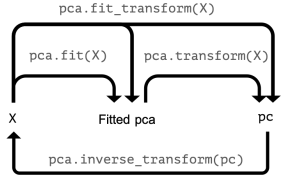

Compressing images (test set of 15 people)
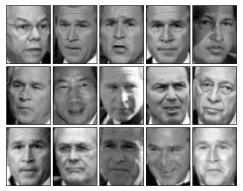

In [ ]:
print(X_test.shape)
# (15, 2914)

62 x 47 pixels = 2914 grayscale values

In [ ]:
print(X_train.shape)
# (1333, 2914)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=290))])

pipe.fit(X_train) #FITADO NO TREINO E REPLICADO NO TESTE
pc = pipe.fit_transform(X_test)

print(pc.shape)
# (15, 290)

Rebuilding images

In [ ]:
pc = pipe.transform(X_test)
print(pc.shape)
# (15, 290)

X_rebuilt = pipe.inverse_transform(pc)

print(X_rebuilt.shape)
# (15, 2914)

img_plotter(X_rebuilt)

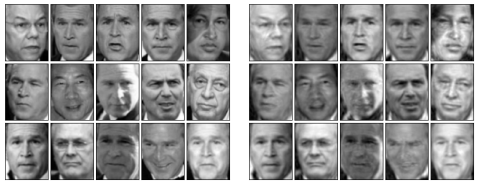

In [ ]:
#Example - 0.8
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

# <script.py> output:
#     11 components selected

#Example - 0.9
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

# <script.py> output:
#     23 components selected

In [ ]:
#Example
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

#Correct! The 'elbow' in the plot is at 3 components (the 3rd component has index 2).

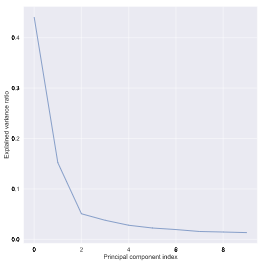

In [ ]:
#Example
# Plot the MNIST sample data
plot_digits(X_test)

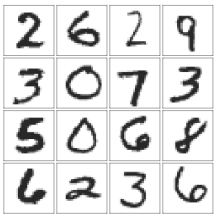

In [ ]:
#Example
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

# <script.py> output:
#     X_test has 784 features
#     pc has 78 features

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

# <script.py> output:
#     X_rebuilt has 784 features

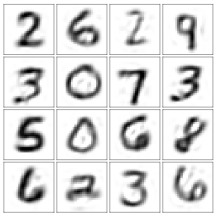

### Congratulations 

What you've learned
- Why dimensionality reduction is important & when to use it
- Feature selection vs extraction
- High dimensional data exploration with t-SNE & PCA
- Use models to find important features
- Remove unimportant ones